In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from skimage.transform import resize

In [22]:
def preprocess_patient(series_img, series_roi):
    assert(len(series_img) == len(series_roi))
    min_x = 100000
    max_x = 0
    
    min_y = 100000
    max_y = 0
    
    for image in list(series_img):
        
        where = np.where(np.sum(image, axis = 0))
        
        if len(where[0]) > 0:
            
            mx_x = where[0][-1]
            mn_x = where[0][0]


            min_x = mn_x if mn_x < min_x else min_x
            max_x = mx_x if mx_x > max_x else max_x
        
        where = np.where(np.sum(image, axis = 1))
        if len(where[0]) > 0:
            
            mx_y = where[0][-1]
            mn_y = where[0][0]

            min_y = mn_y if mn_y < min_y else min_y
            max_y = mx_y if mx_y > max_y else max_y

    series_img_ = [x[min_y: max_y + 1, min_x: max_x + 1] for x in series_img]
    series_roi_ = [x[min_y: max_y + 1, min_x: max_x + 1] for x in series_roi]
    
    return series_img_, series_roi_
   

In [23]:
class Image_class:
    def __init__(self, pat_n, image, roi, n_serial):
        
        self.name = pat_n
        self.image = image
        self.roi = roi
        self.mal = False
        self.n_serial = n_serial
        
        if np.sum(roi) > 0:
            self.mal = True
        
    def print_roi(self, cmap = 'plasma', linewidths = 0.5,  **args):
        plt.contour(self.roi, cmap = cmap, linewidths = linewidths, **args)
            
    def print_image(self, cmap = 'gray', **args):
        plt.imshow(self.image, cmap = 'gray', **args)
         

In [29]:
def parse_and_extract_images(mri_type):
    assert(mri_type in ['t1ce', 't1', 't2', 'flair'])
    
    patients_pos = {}
    patients_neg = {}
    for root, dirs, files in os.walk("BRATS_data_gzs/"):
        if "Brats18" not in root:
            continue
           
        for file in files:
            if mri_type in file:
                file_name = file[::-1][file[::-1].find('_') + 1:][::-1]
                patients_pos[file_name] = []
                patients_neg[file_name] = []
                
                imgs = nib.load(root + '/'+ file).get_data()
                
                try:
                    segs = nib.load(root + '/' + file_name + '_seg.nii').get_data()
                except :
                    print("abscent seg: ", file_name)
                    continue
                
                
                for i, (img, seg) in enumerate(zip(*preprocess_patient(imgs,segs))):
                    if np.sum(img > 0) < 6000:
                        continue
                    seg[seg > 0] = 1
                    Image_instance = Image_class(file_name, img, seg, i)
                    
                    if np.sum(seg) > 0: 
                        patients_pos[file_name].append(file_name + '_' + str(i))
                    else:
                        patients_neg[file_name].append(file_name + '_' + str(i))
        
                    with open('BRATS_preprocessed/'+ file_name + '_' + str(i), 'wb'\
                                 ) as filehandler:
                        #print(file_name)
                        #Image_instance.print_roi(cmap = 'Reds')
                        #Image_instance.print_image()
                        #plt.show()
                        pickle.dump(Image_instance, filehandler)
    
    with open('patients_pos', 'wb') as filehandler:
        pickle.dump(patients_pos, filehandler)
    
    with open('patients_neg', 'wb') as filehandler:
        pickle.dump(patients_neg, filehandler)
        
    

In [30]:
parse_and_extract_images('t1ce')

abscent seg:  Brats18_CBICA_AWI_1


In [ ]:
file = "Brats18_TCIA08_280_1_flair.nii"
file[::-1][file[::-1].find('_') + 1:][::-1]

In [ ]:
"esdasd".find('a')

In [ ]:
import numpy as np
zip(list(np.array([1,2,3])), list(np.array([3,4,5])))

In [ ]:
np.where(np.array([1,2,3]) < 2)

In [7]:
imgs = nib.load("Brats18_TCIA08_280_1_flair.nii").get_data()
Image_instance = Image_class('try', imgs[4], imgs[6], 12)

In [ ]:
with open('BRATS/BRATS_preprocessed/'+ 'try', 'wb') as filehandler:
    pickle.dump(Image_instance, filehandler)

In [ ]:
1 > 2 ? 1:2

In [ ]:
import numpy as np
list(np.array([[1,2,3],[2,3,4]]))

In [28]:
import os

len(list(os.walk('BRATS_preprocessed'))[0][2])



    

31015

In [20]:
import pickle

In [36]:
with open('patients_pos', 'rb') as fp:
    p_p = pickle.load(fp)

In [37]:
p_p

{'Brats18_2013_0_1': ['Brats18_2013_0_1_77',
  'Brats18_2013_0_1_78',
  'Brats18_2013_0_1_79',
  'Brats18_2013_0_1_80',
  'Brats18_2013_0_1_81',
  'Brats18_2013_0_1_82',
  'Brats18_2013_0_1_83',
  'Brats18_2013_0_1_84',
  'Brats18_2013_0_1_85',
  'Brats18_2013_0_1_86',
  'Brats18_2013_0_1_87',
  'Brats18_2013_0_1_88',
  'Brats18_2013_0_1_89',
  'Brats18_2013_0_1_90',
  'Brats18_2013_0_1_91',
  'Brats18_2013_0_1_92',
  'Brats18_2013_0_1_93',
  'Brats18_2013_0_1_94',
  'Brats18_2013_0_1_95',
  'Brats18_2013_0_1_96',
  'Brats18_2013_0_1_97',
  'Brats18_2013_0_1_98',
  'Brats18_2013_0_1_99',
  'Brats18_2013_0_1_100',
  'Brats18_2013_0_1_101',
  'Brats18_2013_0_1_102',
  'Brats18_2013_0_1_103',
  'Brats18_2013_0_1_104',
  'Brats18_2013_0_1_105',
  'Brats18_2013_0_1_106',
  'Brats18_2013_0_1_107',
  'Brats18_2013_0_1_108',
  'Brats18_2013_0_1_109',
  'Brats18_2013_0_1_110',
  'Brats18_2013_0_1_111',
  'Brats18_2013_0_1_112',
  'Brats18_2013_0_1_113',
  'Brats18_2013_0_1_114',
  'Brats18_2013

In [39]:
np.sum([len(p_n[x]) for x in p_n])

15294

In [40]:
np.sum([len(p_p[x]) for x in p_p])

15609

In [41]:
15609 + 14294

29903

In [42]:
Image_class

__main__.Image_class

In [45]:
with open('BRATS_preprocessed/Brats18_2013_4_1_148', 'rb') as fp:
    img = pickle.load(fp)

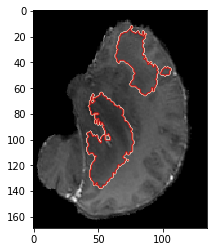

In [46]:
img.print_roi(cmap = 'Reds')
img.print_image()
plt.show()